In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Generate Dataset

In [2]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([ 0.68344647, -0.31630826, -0.6245024 , -0.30593533, -0.58423538,
        0.12291313,  0.82092887,  0.78027194, -0.98221123,  0.28008859])

In [3]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.70335974, -0.58690924, -0.93599469,  0.21420328,  0.72937099,
        0.86851646, -0.10937235,  0.52437529, -0.27611955,  0.74221331])

In [4]:
y = (x1 * 0.3) + (x2 * 0.5) + 0.1 + (np.random.uniform(low=-1.0, high=1.0) * 0.05)
y = 0.0 <= y

print(y.shape)
y[0:10]

(100,)


array([ True, False, False,  True,  True,  True,  True,  True, False,  True], dtype=bool)

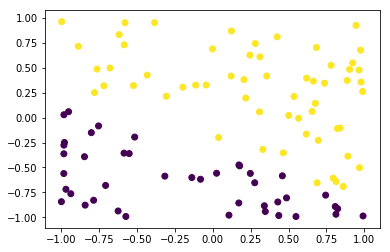

In [5]:
plt.scatter(x1, x2, c=y)

# Gradient Descent

In [6]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(9))

0.000123394575986
0.5
0.999876605424


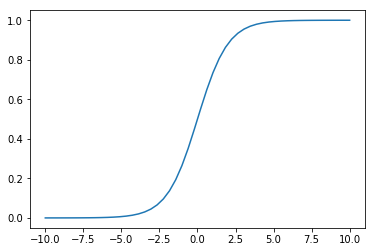

In [7]:
xx = np.linspace(start=-10.0, stop=10.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

In [8]:
num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = (x1 * w1) + (x2 * w2) + b
    y_predict = sigmoid(y_predict)
    
    predict = (0.5 <= y_predict)
    actual = y
    
    error = (predict != actual).mean()
    if error < 0.01:
        break
        
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()
    
print("------------------------")
print("{0:2} error = {1:.5f}, w1 = {2:.5f}, w2 = {3:.5f}, b = {4:.5f}".format(epoch, error, w1, w2, b))

 0 error = 0.42000
------------------------
 7 error = 0.00000, w1 = 0.81970, w2 = 1.59697, b = 0.52888


In [9]:
import pandas as pd

In [10]:
pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': predict, '맞춤?': (y == predict)}).head()

,x1,x2,y(actual),y(predict),맞춤?
0,0.683446,0.703360,True,True,True
1,-0.316308,-0.586909,False,False,True
2,-0.624502,-0.935995,False,False,True
3,-0.305935,0.214203,True,True,True
4,-0.584235,0.729371,True,True,True


In [11]:
xx = np.linspace(start=-1.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

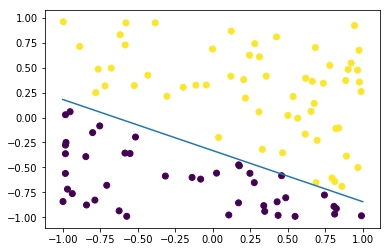

In [12]:
plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

# Multi-class Classification

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()

In [14]:
X = iris["data"]

print(X.shape)
X[0:10]

(150, 4)


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [15]:
y = iris["target"]

print(y.shape)
y[0:10]

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
data = pd.DataFrame(X, columns=iris['feature_names'])
data['y'] = y

print(data.shape)
data.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


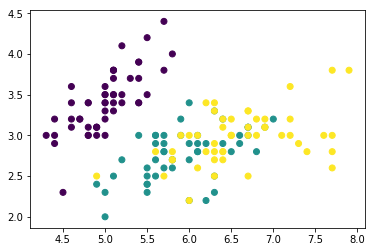

In [17]:
plt.scatter(data["sepal length (cm)"], data["sepal width (cm)"], c=y)

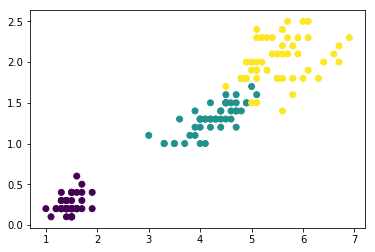

In [18]:
plt.scatter(data["petal length (cm)"], data["petal width (cm)"], c=y)

In [19]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y_hot.shape)
y_hot[0:5]

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(150, 3)


array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

# Gradient Descent

In [20]:
num_epoch = 1000
learning_rate = 0.01

w = np.random.uniform(low=0.0, high=1.0, size=(4, 3))
b = np.random.uniform(low=0.0, high=1.0, size=3)

for epoch in range(num_epoch):
    y_predict_hot = X.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    y_predict = y_predict_hot.argmax(axis=1)
    
    error = (y != y_predict).mean()
    
    if error < 0.1:
        break
        
    if epoch % 10 == 0:
        print("[{0:2} error = {1:.5f}]".format(epoch, error))
    
    w = w - learning_rate * X.T.dot(y_predict_hot - y_hot)
    b = b - learning_rate * (y_predict_hot - y_hot).mean(axis=0)

print("----" * 10)
print("[{0:2} error = {1:.5f}]".format(epoch, error))

[ 0 error = 0.66667]
[10 error = 0.57333]
[20 error = 0.34000]
[30 error = 0.33333]
[40 error = 0.47333]
[50 error = 0.33333]
[60 error = 0.32000]
[70 error = 0.33333]
----------------------------------------
[75 error = 0.06667]


In [21]:
result = data.copy()
result["y(predict)"] = y_predict
result["맞춤?"] = result["y"] == result["y(predict)"]

print(result.shape)
result[result["맞춤?"] == False].count()

(150, 7)


sepal length (cm)    10
sepal width (cm)     10
petal length (cm)    10
petal width (cm)     10
y                    10
y(predict)           10
맞춤?                  10
dtype: int64

In [25]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


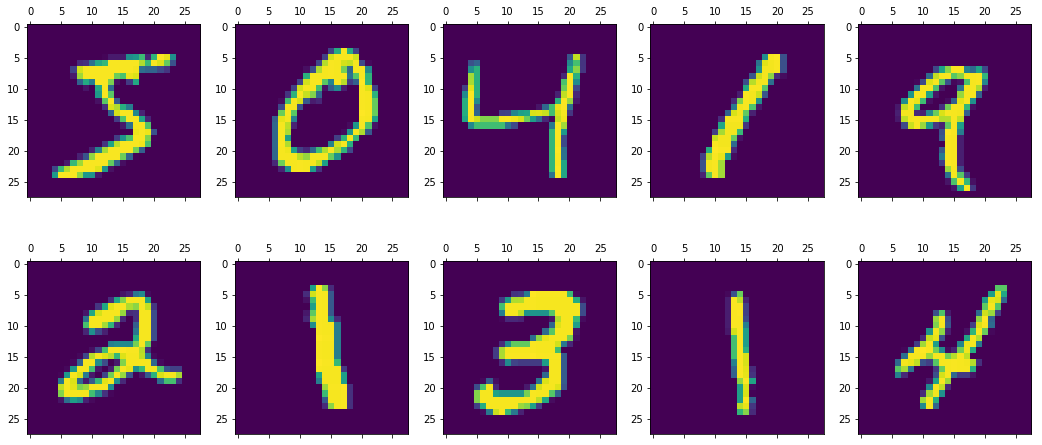

In [32]:
figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(18, 8)

print("label = {0}".format(y_train[0:15]))

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

In [38]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [39]:
y_train_hot = np.eye(10)[y_train]

print(y_train_hot.shape)
y_train_hot[0:5]

(60000, 10)


array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [40]:
y_test_hot = np.eye(10)[y_test]

print(y_test_hot.shape)
y_test_hot[0:5]

(10000, 10)


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [54]:
num_epoch = 1000
learning_rate = 0.01

w = np.random.uniform(low=0.0, high=1.0, size=(28 * 28, 10))
b = np.random.uniform(low=0.0, high=1.0, size=10)

for epoch in range(num_epoch):
    y_predict_hot = X_train.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    y_predict = y_predict_hot.argmax(axis=1)
    
    error = (y_train != y_predict).mean()
    
    if error < 0.15:
        break
        
#     if epoch % 10 == 0:
#         print("[{0:2} error = {1:.5f}]".format(epoch, error))
    print("[{0:2} error = {1:.5f}]".format(epoch, error))
    
    w = w - learning_rate * X_train.T.dot(y_predict_hot - y_train_hot)
    b = b - learning_rate * (y_predict_hot - y_train_hot).mean(axis=0)

print("----" * 10)
print("[{0:2} error = {1:.5f}]".format(epoch, error))

[ 0 error = 0.90128]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[ 1 error = 0.90128]
[ 2 error = 0.90128]
[ 3 error = 0.90128]
[ 4 error = 0.90128]
[ 5 error = 0.90128]
[ 6 error = 0.90013]
[ 7 error = 0.75648]
[ 8 error = 0.42543]
[ 9 error = 0.37080]
[10 error = 0.30627]
[11 error = 0.32887]
[12 error = 0.31122]
[13 error = 0.24622]
[14 error = 0.29873]
[15 error = 0.23253]
[16 error = 0.28523]
[17 error = 0.22040]
[18 error = 0.28382]
[19 error = 0.20938]
[20 error = 0.32258]
[21 error = 0.23243]
[22 error = 0.32542]
[23 error = 0.26418]
[24 error = 0.31685]
[25 error = 0.18970]
[26 error = 0.29598]
[27 error = 0.19040]
[28 error = 0.30888]
[29 error = 0.18812]
[30 error = 0.24730]
[31 error = 0.18157]
[32 error = 0.25645]
[33 error = 0.18117]
[34 error = 0.30940]
[35 error = 0.19390]
[36 error = 0.35085]
[37 error = 0.18373]
[38 error = 0.30020]
[39 error = 0.20140]
[40 error = 0.34680]
[41 error = 0.17308]
[42 error = 0.24017]
[43 error = 0.18307]
[44 error = 0.27875]
[45 error = 0.20667]
[46 error = 0.27618]
[47 error = 0.22992]
[48 error = 0